# Explotary data analytcise 

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
# Upload the data into dataset
df = pd.read_csv("hr_dashboard_data.csv")

In [139]:
# Read the dataset
df.tail()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,Jan-19,50051
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,Jan-21,46612
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,Jan-21,32992
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,Jan-05,104216
199,Victor Gutierrez,43,Male,10,86,71,2.0,IT,Team Lead,Jan-14,104341


In [140]:
# Information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   200 non-null    object 
 1   Age                    200 non-null    int64  
 2   Gender                 200 non-null    object 
 3   Projects Completed     200 non-null    int64  
 4   Productivity (%)       200 non-null    int64  
 5   Satisfaction Rate (%)  200 non-null    int64  
 6   Feedback Score         200 non-null    float64
 7   Department             200 non-null    object 
 8   Position               200 non-null    object 
 9   Joining Date           200 non-null    object 
 10  Salary                 200 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 17.3+ KB


In [141]:
# Converting Joining Date into date type
df['Joining Date']=pd.to_datetime(df['Joining Date'],format="%b-%y")
df['Experience']=2025-df['Joining Date'].dt.year
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Experience
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,2020-01-01,63596,5
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,1999-01-01,112540,26
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,2017-01-01,66292,8
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,2022-01-01,38303,3
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,2005-01-01,101133,20


##### Cleaning is done and managing data types.

##### Each column datatype is suitable for each columns

In [142]:
df.isnull().sum()

Name                     0
Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
Salary                   0
Experience               0
dtype: int64

##### Here we can see that our data is null free

In [143]:
df.describe()

,Age,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Joining Date,Salary,Experience
count,200.000000,200.000000,200.000000,200.000000,200.000000,200,200.000000,200.000000
mean,34.650000,11.455000,46.755000,49.935000,2.883000,2014-01-11 20:45:36,76619.245000,10.970000
min,22.000000,0.000000,0.000000,0.000000,1.000000,1998-01-01 00:00:00,30231.000000,3.000000
25%,26.000000,6.000000,23.000000,25.750000,1.900000,2008-01-01 00:00:00,53080.500000,5.000000
50%,32.000000,11.000000,45.000000,50.500000,2.800000,2017-01-01 00:00:00,80540.000000,8.000000
75%,41.000000,17.000000,70.000000,75.250000,3.900000,2020-01-01 00:00:00,101108.250000,17.000000
max,60.000000,25.000000,98.000000,100.000000,4.900000,2022-01-01 00:00:00,119895.000000,27.000000
std,9.797318,6.408849,28.530068,28.934353,1.123263,NaN,27082.299202,6.701016


##### Describe the whole numerical dataset here.

In [144]:
bins = [20,25,30,35,40,45,50,55,60]
labels =  ['20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60']
df['Age Group'] = pd.cut(df['Age'],bins = bins,labels = labels, right=False)

In [145]:
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,Experience,Age Group
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,2020-01-01,63596,5,25-30
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,1999-01-01,112540,26,55-60
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,2017-01-01,66292,8,30-35
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,2022-01-01,38303,3,25-30
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,2005-01-01,101133,20,40-45


<Axes: ylabel='count'>

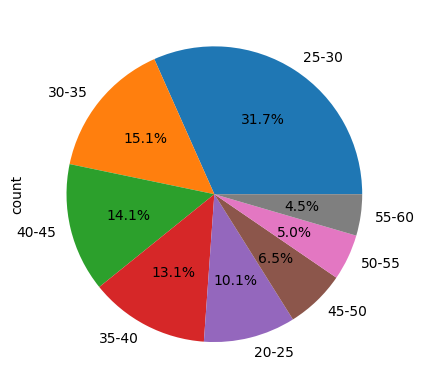

In [146]:
# With Age-Group(derived from 'Age' column)
df['Age Group'].value_counts().plot.pie(autopct='%1.1f%%')

##### Showing heavily concentrated in the 25–30 age group.

<Axes: xlabel='Projects Completed', ylabel='Count'>

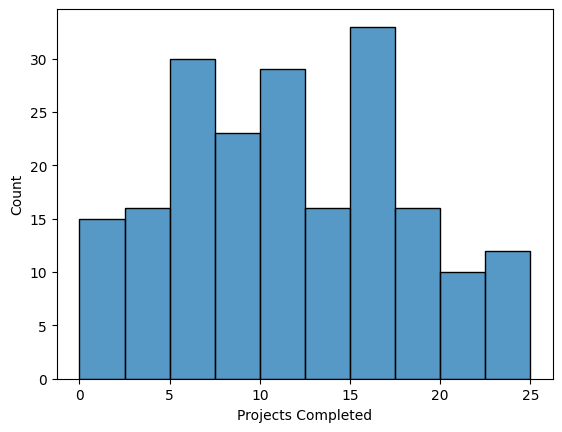

In [147]:
# By using 'Projects Completed' column
sns.histplot(df['Projects Completed'],bins=10)

##### The distribution of projects completed is spread fairly evenly, with most employees completing between 5–17 projects. No extreme imbalance was found.”

<Axes: xlabel='Productivity (%)', ylabel='Count'>

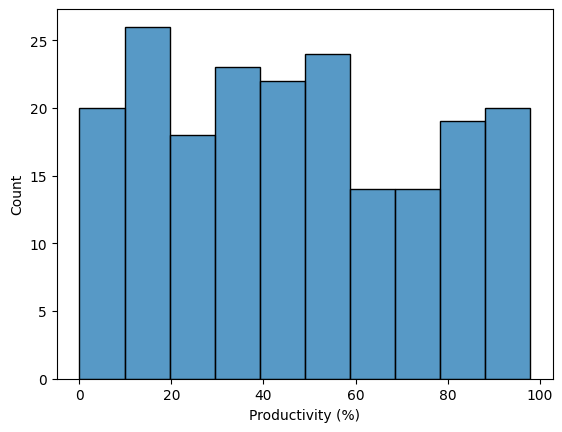

In [148]:
# By using 'Productivity' column
sns.histplot(df['Productivity (%)'],bins=10)

##### A large number comes within moderate, which suggest room for improvement.

<Axes: xlabel='Salary', ylabel='Count'>

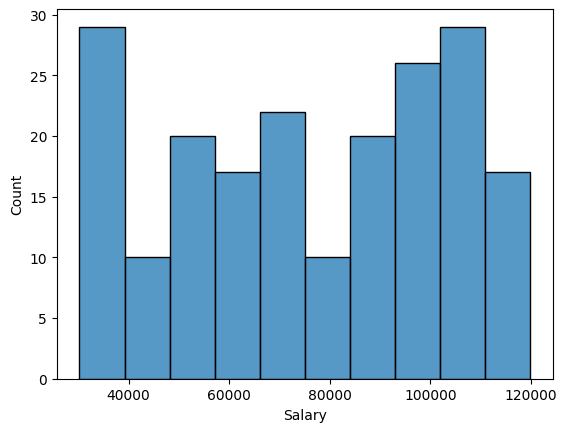

In [149]:
# By Using Salary column
sns.histplot(df['Salary'],bins=10)

##### A significate number falls under lowest salary bracket and a substantinal group in the higher salary bracket.

In [150]:
# What is the average salary for each position?
df.groupby('Position')['Salary'].mean().round(2)

Position
Analyst              68195.70
Intern               34811.50
Junior Developer     52104.11
Manager             110091.48
Senior Developer     86481.50
Team Lead           100228.06
Name: Salary, dtype: float64

In [151]:
# Which department has the most experienced employees?
df.groupby('Department')['Experience'].mean().round(2)

Department
Finance      11.46
HR           10.53
IT           12.29
Marketing    10.05
Sales        10.60
Name: Experience, dtype: float64

In [152]:
emp_count = df.groupby(['Position','Gender']).size().reset_index(name='Name_count')
emp_count

,Position,Gender,Name_count
0,Analyst,Female,12
1,Analyst,Male,21
2,Intern,Female,15
3,Intern,Male,15
4,Junior Developer,Female,19
5,Junior Developer,Male,16
6,Manager,Female,22
7,Manager,Male,18
8,Senior Developer,Female,14
9,Senior Developer,Male,16


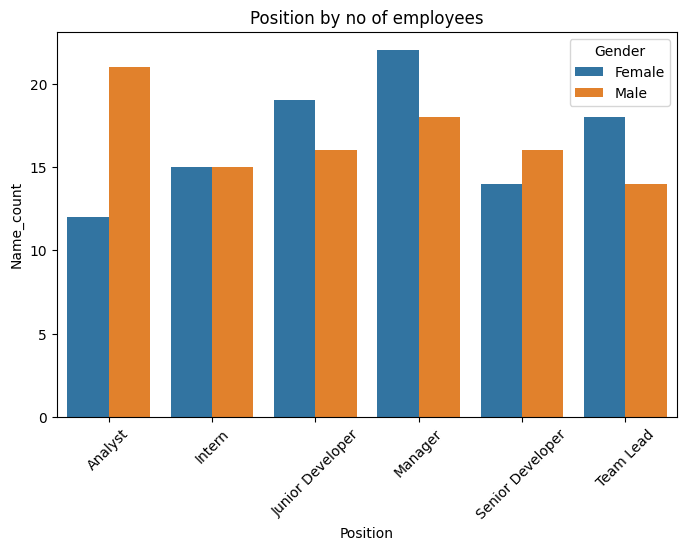

In [153]:
# Position + No of employee + gender
plt.figure(figsize=(8,5))
sns.barplot(x='Position',y='Name_count',hue = 'Gender',data=emp_count)
plt.title('Position by no of employees')
plt.xticks(rotation=45)
plt.show()

##### Overall, there appear to be equal no of both gender, with the most significant disparity observed in the 'Analyst' role and 'Manager' role.

In [154]:
emp_count1 = df.groupby(['Department','Gender']).size().reset_index(name='Name_count')
emp_count1

,Department,Gender,Name_count
0,Finance,Female,17
1,Finance,Male,24
2,HR,Female,19
3,HR,Male,13
4,IT,Female,16
5,IT,Male,22
6,Marketing,Female,24
7,Marketing,Male,18
8,Sales,Female,24
9,Sales,Male,23


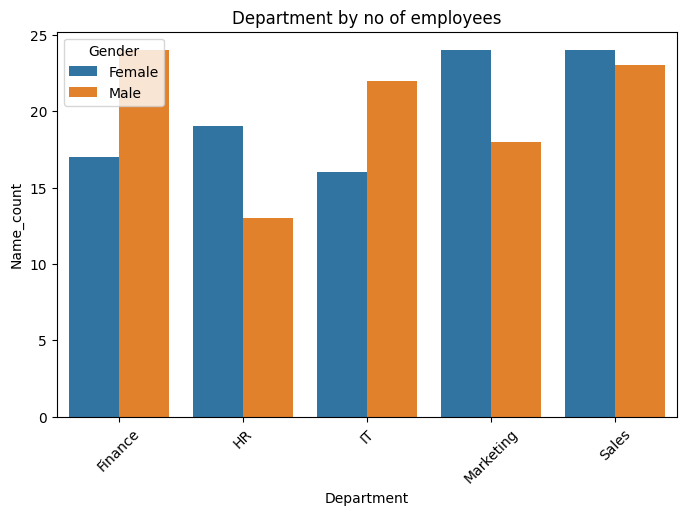

In [155]:
# Department + No of employee + gender
plt.figure(figsize=(8,5))
sns.barplot(x='Department',y='Name_count',hue = 'Gender',data=emp_count1)
plt.title('Department by no of employees')
plt.xticks(rotation=45)
plt.show()

##### 'Finence', 'HR', 'IT' and 'Marketing' depatment has most disparity, other habd 'sales' seems moderate.

In [156]:
emp_count2 = df.groupby(['Joining Date']).size().reset_index(name='Name_count')

<Axes: xlabel='Joining Date', ylabel='Name_count'>

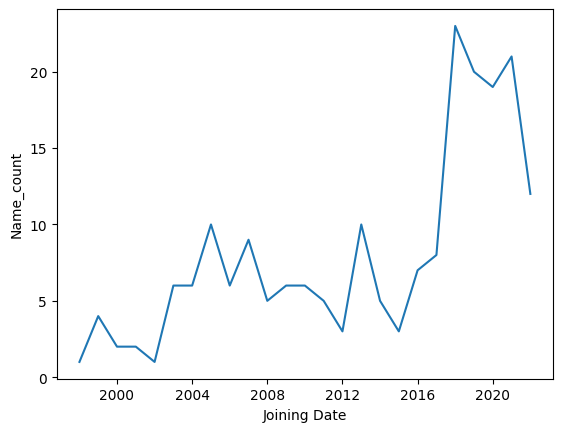

In [157]:
sns.lineplot(x='Joining Date',y='Name_count', data=emp_count2)

##### Number incresed of employees who joined organisation in between 2018 to 2022

<Axes: xlabel='Department', ylabel='Salary'>

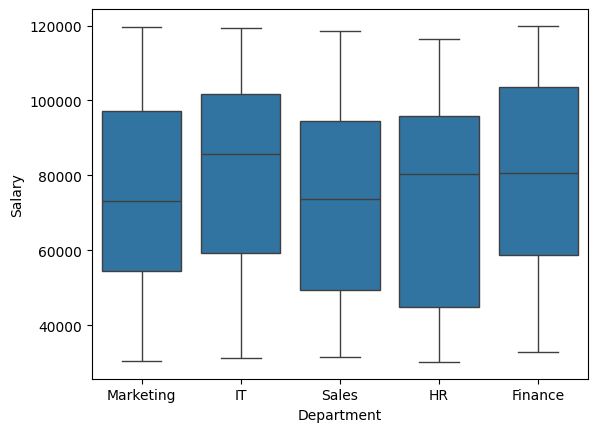

In [158]:
sns.boxplot(x='Department',y='Salary',data=df)

##### Marketting department geting muvh lesser than others. Most HR getting less salary then average salary.

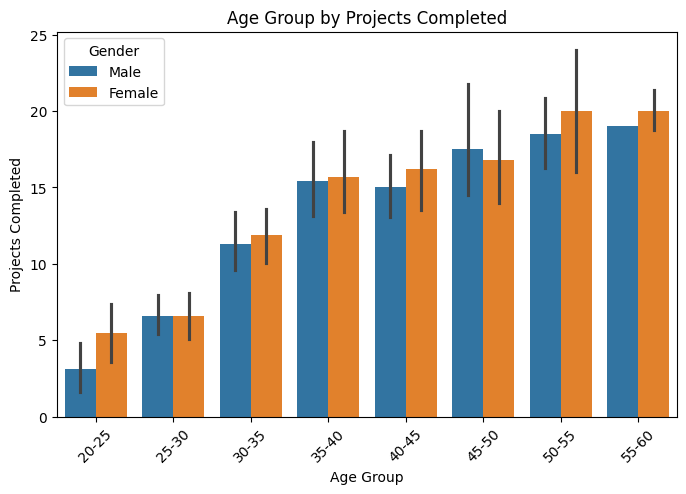

In [159]:
plt.figure(figsize=(8,5))
sns.barplot(y='Projects Completed',x='Age Group',hue = 'Gender',data=df)
plt.title('Age Group by Projects Completed')
plt.xticks(rotation=45)
plt.show()

##### No of Project incresed based on age or we can say that age and project are directly propostion to each other.

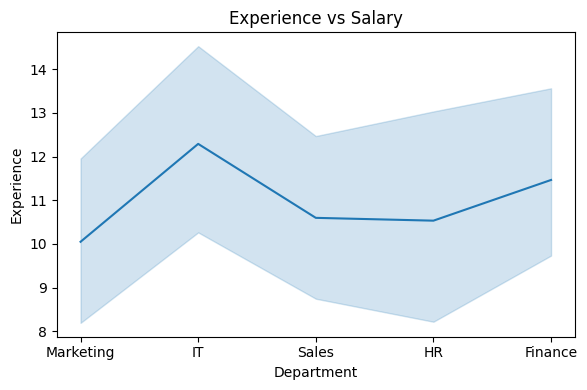

In [160]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='Department', y='Experience', data=df)
plt.title('Experience vs Salary')
plt.tight_layout()
plt.show()


##### 'IT' and 'Finance' has much experience employees

<Axes: xlabel='Experience', ylabel='count'>

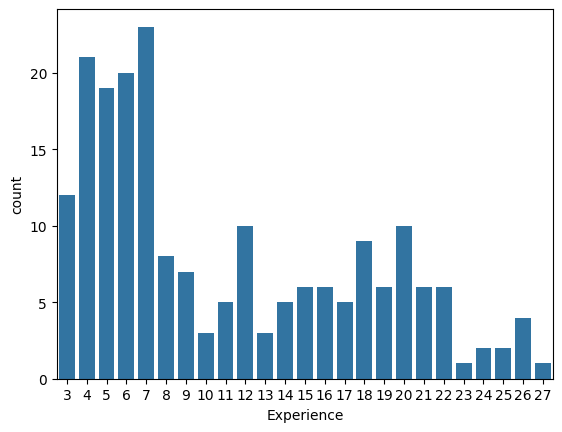

In [161]:
# Experience
sns.countplot(x='Experience',data=df)

##### It shows that company is good for short work but for long term, it is not.